## Final Project Submission

Please fill out:
* Student name: Matt Pucci
* Student pace: Self Paced
* Scheduled project review date/time: 
* Instructor name: Eli Thomas
* Blog post URL:


# OBTAIN

In [376]:
#importing appropriate librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [377]:
#load the Kansas City housing data
df = pd.read_csv('kc_house_data.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# DATA SCRUBBING

In [378]:
#From the above visual, you can see that date and sqft_basement have object string types.  Lets change date into an appropriate string type and think of ways to handle the sqft_basement values.
df['date'] = pd.to_datetime(df.date) #Lets check and see if we were successful.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

In [379]:
#There are 454 observations that fall under '?'.  Lets see what we can find out from the sqft_basement value counts.
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
480.0       103
450.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
          ...  
2300.0        1
935.0         1
283.0         1
2050.0        1
1008.0        1
417.0         1
295.0         1
602.0         1
1913.0        1
652.0         1
2850.0        1
4820.0        1
1770.0        1
2240.0        1
374.0         1
1930.0        1
475.0         1
143.0         1
3260.0        1
276.0         1
1525.0        1
506.0         1
207.0         1
1281.0        1
2730.0        1
516.0         1
243.0         1
861.0         1
1920.0        1
2120.0        1
Name: sqft_basement, Len

From the above visual we can see that 12,826 of the 21,597 (~60%) total obersations in '?' have values of 0.0 (house with no basement.  Given that only 454 of the 21,597 observations fall under '?' (~2%) lets assign the '?' values to zero (0.0)

In [380]:
df.sqft_basement=df.sqft_basement.map(lambda x: '0' if x=='?' else x) #Use a lambda function to remove ? 
df.sqft_basement.value_counts()

0.0       12826
0           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
450.0       103
480.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
          ...  
1248.0        1
2240.0        1
1930.0        1
935.0         1
2730.0        1
946.0         1
2130.0        1
2390.0        1
1481.0        1
3480.0        1
2050.0        1
417.0         1
475.0         1
704.0         1
4820.0        1
276.0         1
2610.0        1
248.0         1
1281.0        1
65.0          1
207.0         1
3260.0        1
243.0         1
861.0         1
2120.0        1
652.0         1
602.0         1
666.0         1
295.0         1
2810.0        1
Name: sqft_basement, Len

All 454 '?' observations now fall under 0.0.  Lets now change the string type to float64.

In [381]:
df.sqft_basement= df.sqft_basement.astype('float')
# Lets check to see if we have properly removed all 'Object' string types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

Another crucial step in insuring that our model performs to the best of its ability with the given data set is to check for any null values.

In [382]:
print('Columns with Null Values:')
df.isna().sum()

Columns with Null Values:


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

From this we can see that waterfront, view and yr_renovated are the only columns that contain null values.  The columns waterfront and view can be considered as a binary variable as they only take two values.  Ex: Is Waterfront/ is not waterfront or Has a view/Does not have a view.  For the yr_renovated column, we will assume that a null/missing value means that the house did not get renovated.  For the above reasons we will replace all the null values with 0 using the fillna() function.

In [383]:
df.waterfront= df.waterfront.fillna(0)
df.view=df.view.fillna(0)
df.yr_renovated=df.yr_renovated.fillna(0)

Lets check to see if we replaced the null values correctly

In [384]:
print('Columns with Null Values:')
df.isna().sum()

Columns with Null Values:


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Since we made numerous changes to our dataset, its crucial to make a non-edited copy of our dataframe so we can compare our model to the original later on in the model and in case of error.  

In [385]:
df_unedited_data=df.copy()

# EXPLORING THE DATA

Lets now test for multi-collinearity.

In [386]:
import pandas as pd
data=pd.read_csv('kc_house_data.csv')
data_pred=data.iloc[:,1:25]

In [387]:
df.corr=data_pred.corr()
#Find the total number of correlations that are greater than .75. 
abs(data_pred.corr())>.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False


Although the above chart has a lot of meaningful information behind it, it is quite difficult to interpret.  Lets visualize these results using a Seaborn Heatmap.  

Text(0.5, 1.0, 'Figure 1: Correlation Between House Differentiators')

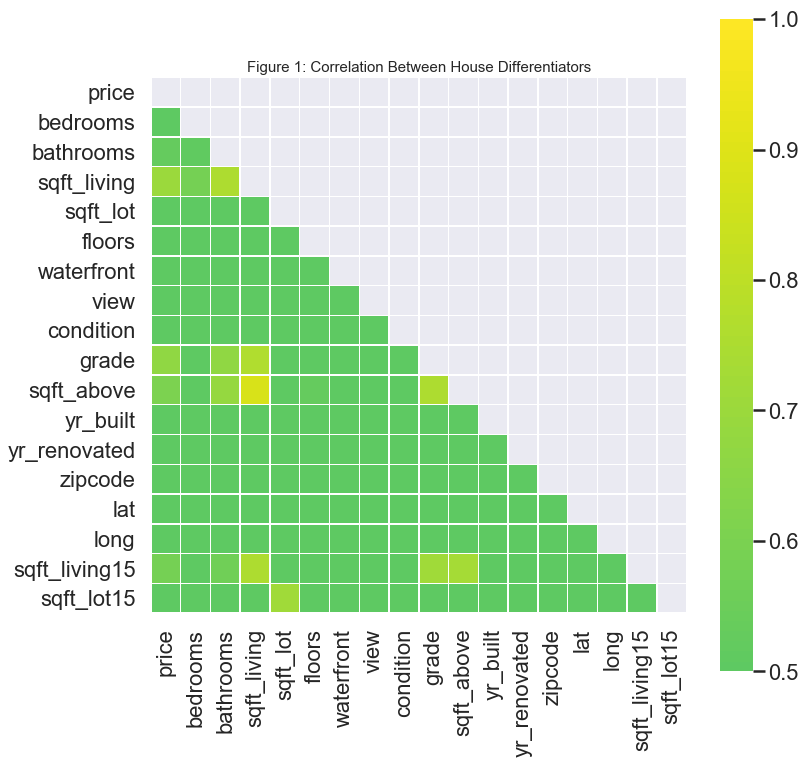

In [388]:
plt.figure(figsize=(12,12))
mask = np.zeros_like(df.corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr, mask=mask, center=0, vmin=0.5, square=True, linewidths=.5, cmap='viridis')
sns.set_context('talk')
plt.title('Figure 1: Correlation Between House Differentiators', fontdict={'fontsize': 15})

### Figure 1 shows us that there is a strong correlation between:
    -sqft_living and sqft_above
    -sqft_living and sqft_living15
    -sqft_living and grade
To improve our model, let's now remove sqft_above and sqft_living15.  

In [389]:
df.drop('sqft_above', axis=1, inplace=True)

In [390]:
df.drop('sqft_living15', axis=1, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c24c7efd0>,
      dtype=object)

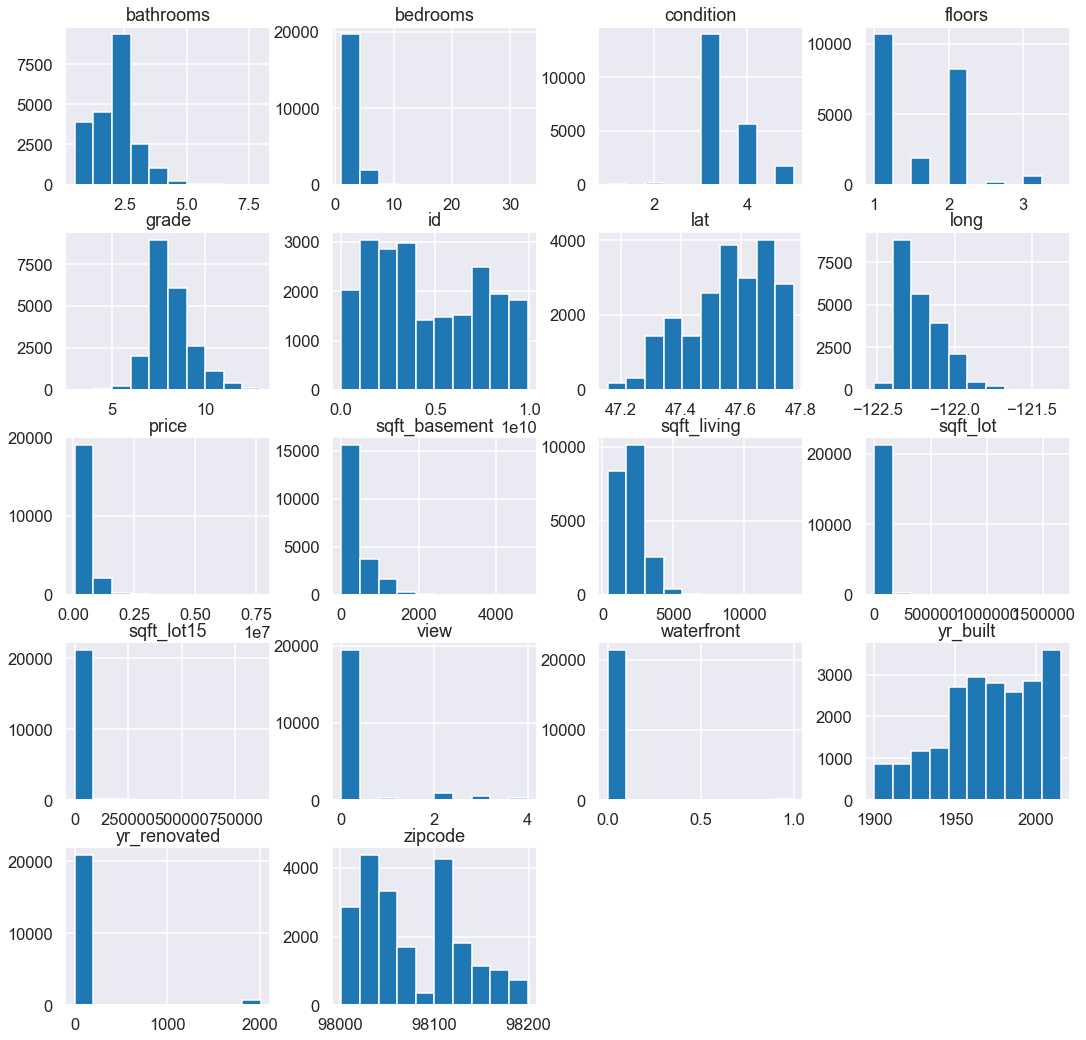

In [391]:
df.hist(figsize=(18,18))

### The above histograms show us that our two variables have been successfully dropped from our dataset.  The distributions upon first glance are not normal, this generally means some sort of outlier.  To improve our models accuracy it is crucial to identify and remove any outliers.

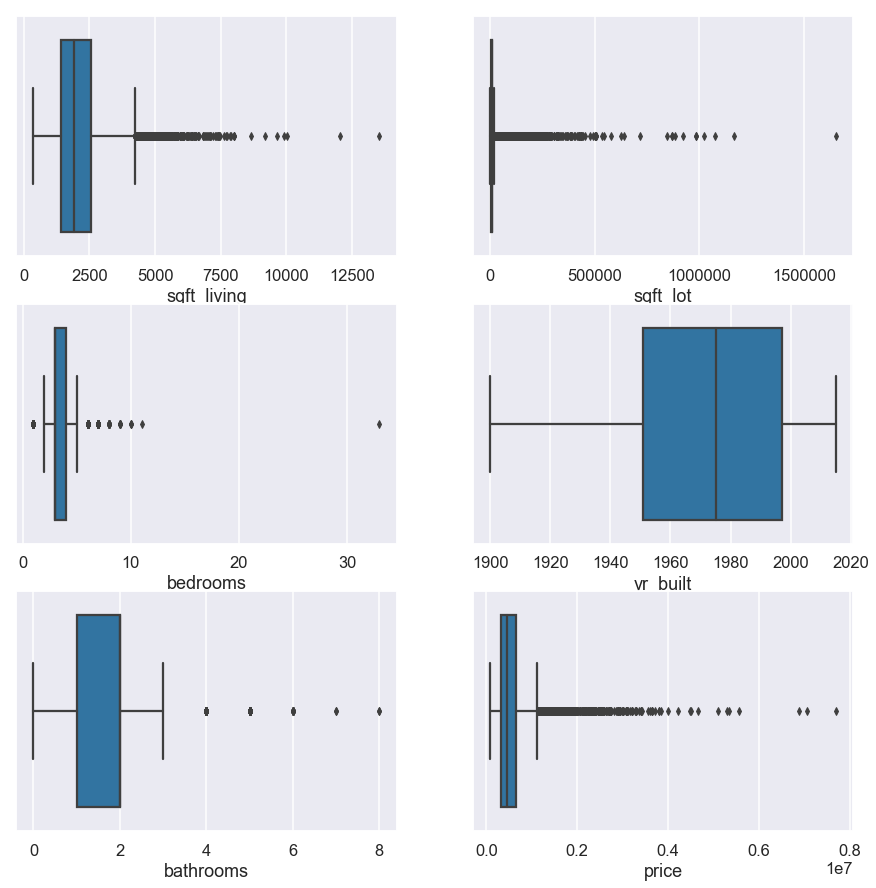

In [392]:
plt.figure(figsize=(15,15))
plt.subplot(321)
sns.boxplot(df.sqft_living)
plt.subplot(322)
sns.boxplot(df.sqft_lot)
plt.subplot(323)
sns.boxplot(df.bedrooms)
plt.subplot(324)
sns.boxplot(df.yr_built)
plt.subplot(325)
sns.boxplot(df.bathrooms.astype('int'))
plt.subplot(326)
sns.boxplot(df.price)

### It is evident that our dataset has a significant amount of outliers as shown in the above boxplots. Any point to the right or left of the boxplot is an outlier.  Let's set appropriate ranges for the variables above given the boxplots. As shown in with df.info(), there are currently 21,597 total obesrvations.  Let's examine the distributions of these variables individually to make them better fit for our model.  

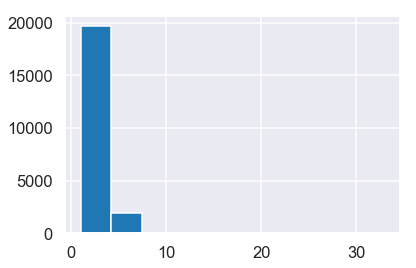

In [393]:
df.bedrooms.hist()

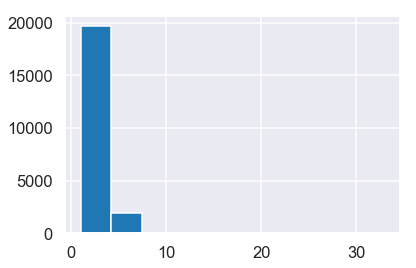

In [394]:
df.bedrooms.hist()

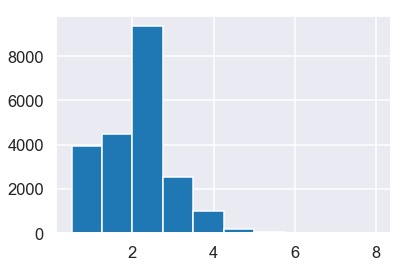

In [395]:
df.bathrooms.hist()

In [396]:
df.bathrooms.round().value_counts()

2.0    13847
1.0     3931
3.0     2527
4.0     1201
5.0       57
6.0       24
8.0        4
0.0        4
7.0        2
Name: bathrooms, dtype: int64

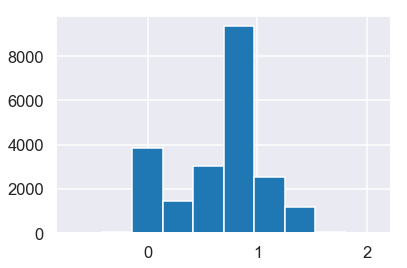

In [397]:
#Lets now transform the bathroom data into log form
np.log(df.bathrooms).hist()

Even after transforming the data and logging it, bathrooms does not have a good distribution of data so we will decide what to do with this later on in our model.

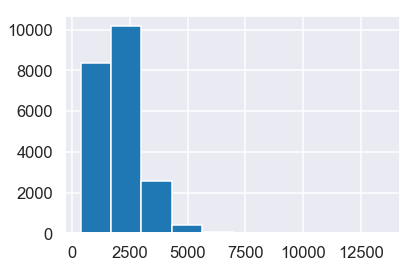

In [398]:
df.sqft_living.hist()
df.drop(df.index[df['sqft_living'] > 4000], inplace=True)

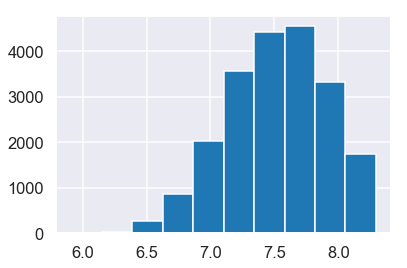

In [399]:
(np.log(df.sqft_living)).hist()

In [400]:
#Much better distribution
df.sqft_living=np.log(df.sqft_living)

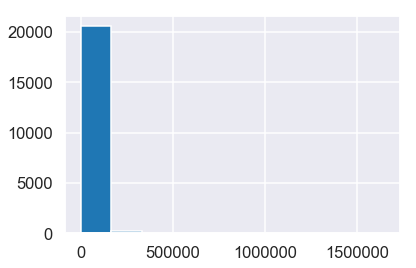

In [401]:
df.sqft_lot.hist()

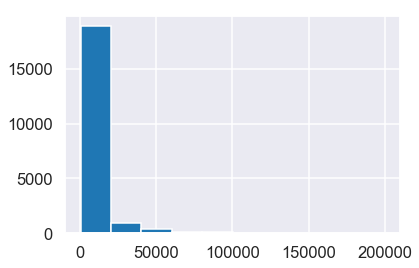

In [402]:
df.drop(df.index[df['sqft_lot'] > 200000], inplace=True)
df.sqft_lot.hist()

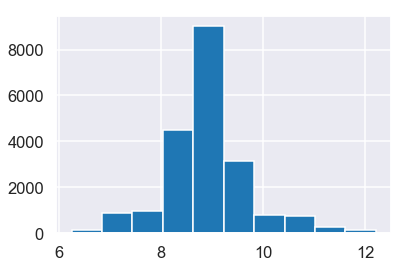

In [403]:
#Lets take the log of the sqft_lot
(np.log(df.sqft_lot)).hist()
df.sqft_lot = np.log(df.sqft_lot)

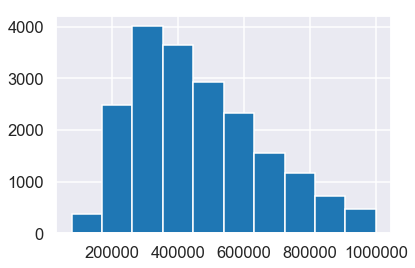

In [404]:
df.drop(df.index[df['price']>1000000], inplace=True) 
df.price.hist()

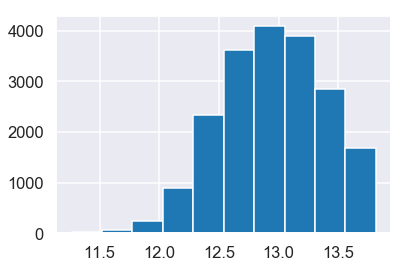

In [405]:
(np.log(df.price)).hist()

In [406]:
y=(np.log(df.price))

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19700 entries, 0 to 21596
Data columns (total 19 columns):
id               19700 non-null int64
date             19700 non-null datetime64[ns]
price            19700 non-null float64
bedrooms         19700 non-null int64
bathrooms        19700 non-null float64
sqft_living      19700 non-null float64
sqft_lot         19700 non-null float64
floors           19700 non-null float64
waterfront       19700 non-null float64
view             19700 non-null float64
condition        19700 non-null int64
grade            19700 non-null int64
sqft_basement    19700 non-null float64
yr_built         19700 non-null int64
yr_renovated     19700 non-null float64
zipcode          19700 non-null int64
lat              19700 non-null float64
long             19700 non-null float64
sqft_lot15       19700 non-null int64
dtypes: datetime64[ns](1), float64(11), int64(7)
memory usage: 3.0 MB


Text(0.5, 1.0, 'Figure 1: Updated Distributions')

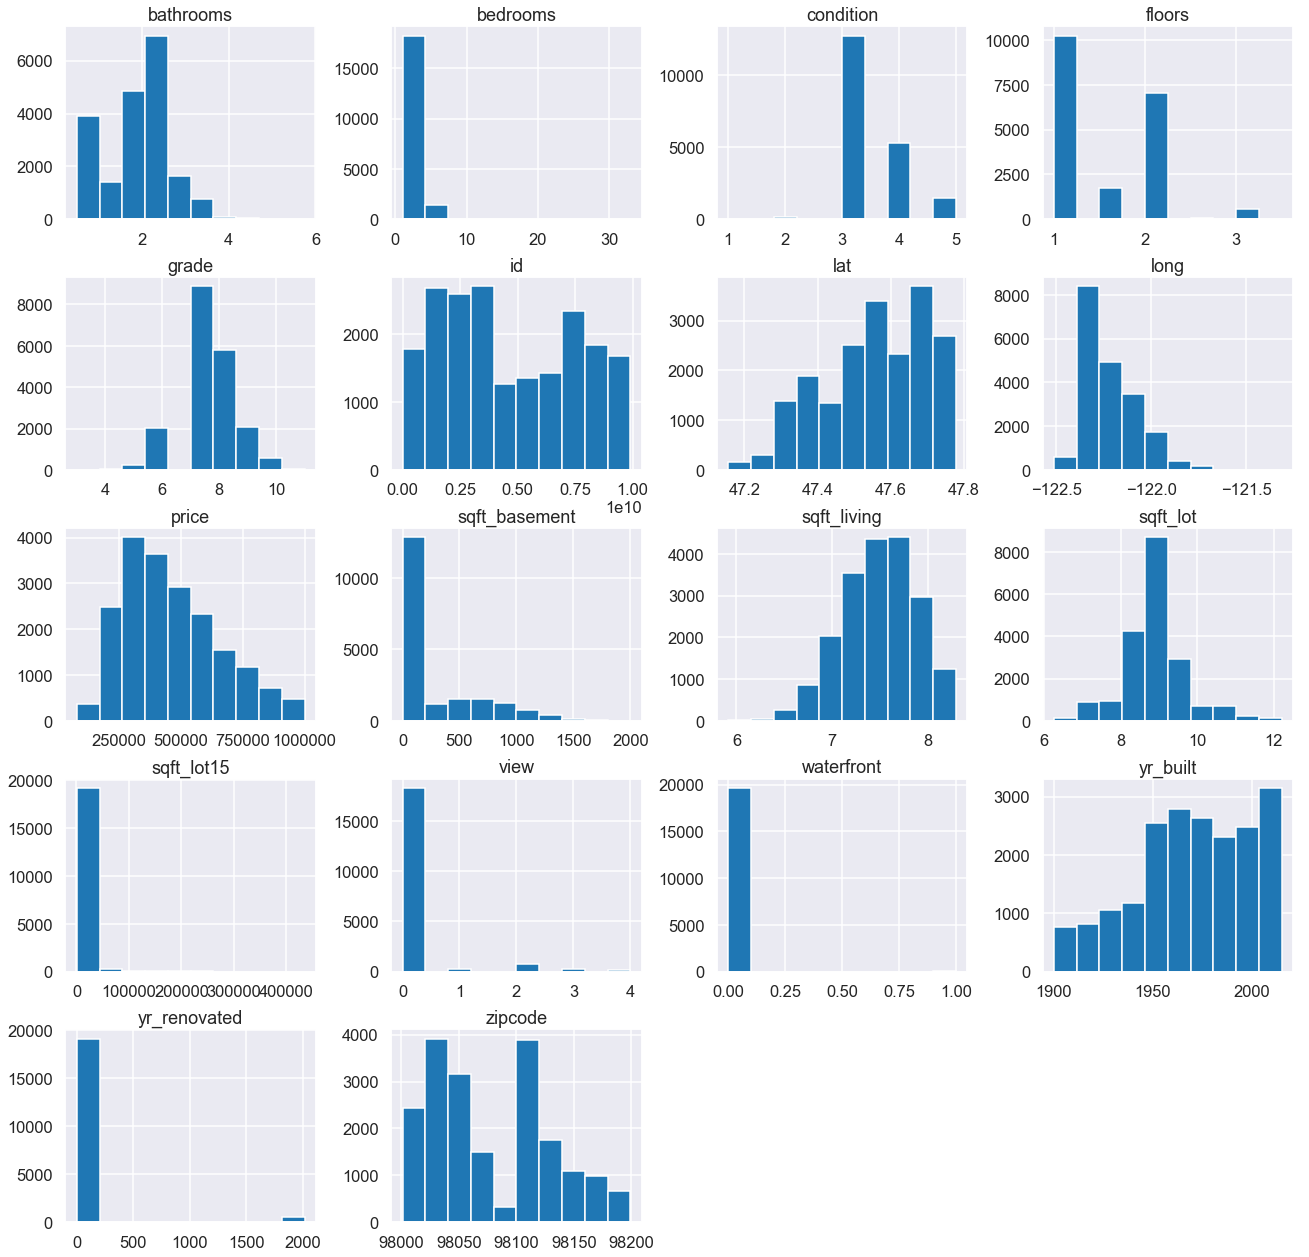

In [408]:
df.hist(figsize=(22,22))
plt.title('Figure 1: Updated Distributions')

### The above histograms show some of our variables depicting a much more normal distribution, however some of them still have a very bad distribution.  We will explore the data further before deciding what to do with these features.  

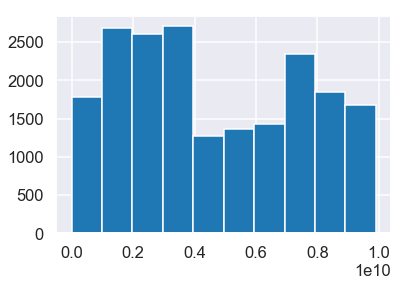

In [409]:
df.id.hist()

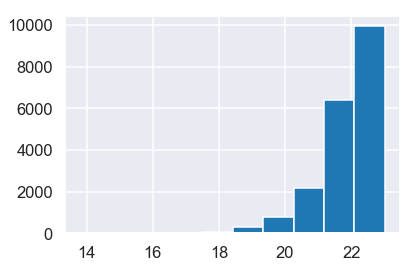

In [410]:
(np.log(df.id)).hist() #Lets see what the distribution looks like if we take the log of 'id'.

This data is clearly skewed so lets drop it all together.  

In [411]:
df.drop('id', axis=1, inplace=True)

In [412]:
df.info()#checking to see if 'id' was properly dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19700 entries, 0 to 21596
Data columns (total 18 columns):
date             19700 non-null datetime64[ns]
price            19700 non-null float64
bedrooms         19700 non-null int64
bathrooms        19700 non-null float64
sqft_living      19700 non-null float64
sqft_lot         19700 non-null float64
floors           19700 non-null float64
waterfront       19700 non-null float64
view             19700 non-null float64
condition        19700 non-null int64
grade            19700 non-null int64
sqft_basement    19700 non-null float64
yr_built         19700 non-null int64
yr_renovated     19700 non-null float64
zipcode          19700 non-null int64
lat              19700 non-null float64
long             19700 non-null float64
sqft_lot15       19700 non-null int64
dtypes: datetime64[ns](1), float64(11), int64(6)
memory usage: 2.9 MB


### The distributions of Longitude and Latitude also seem a little odd, lets look further into their relationship with price.

Text(0.5, 1.0, 'Influence of Longitude and Latitude on House Prices')

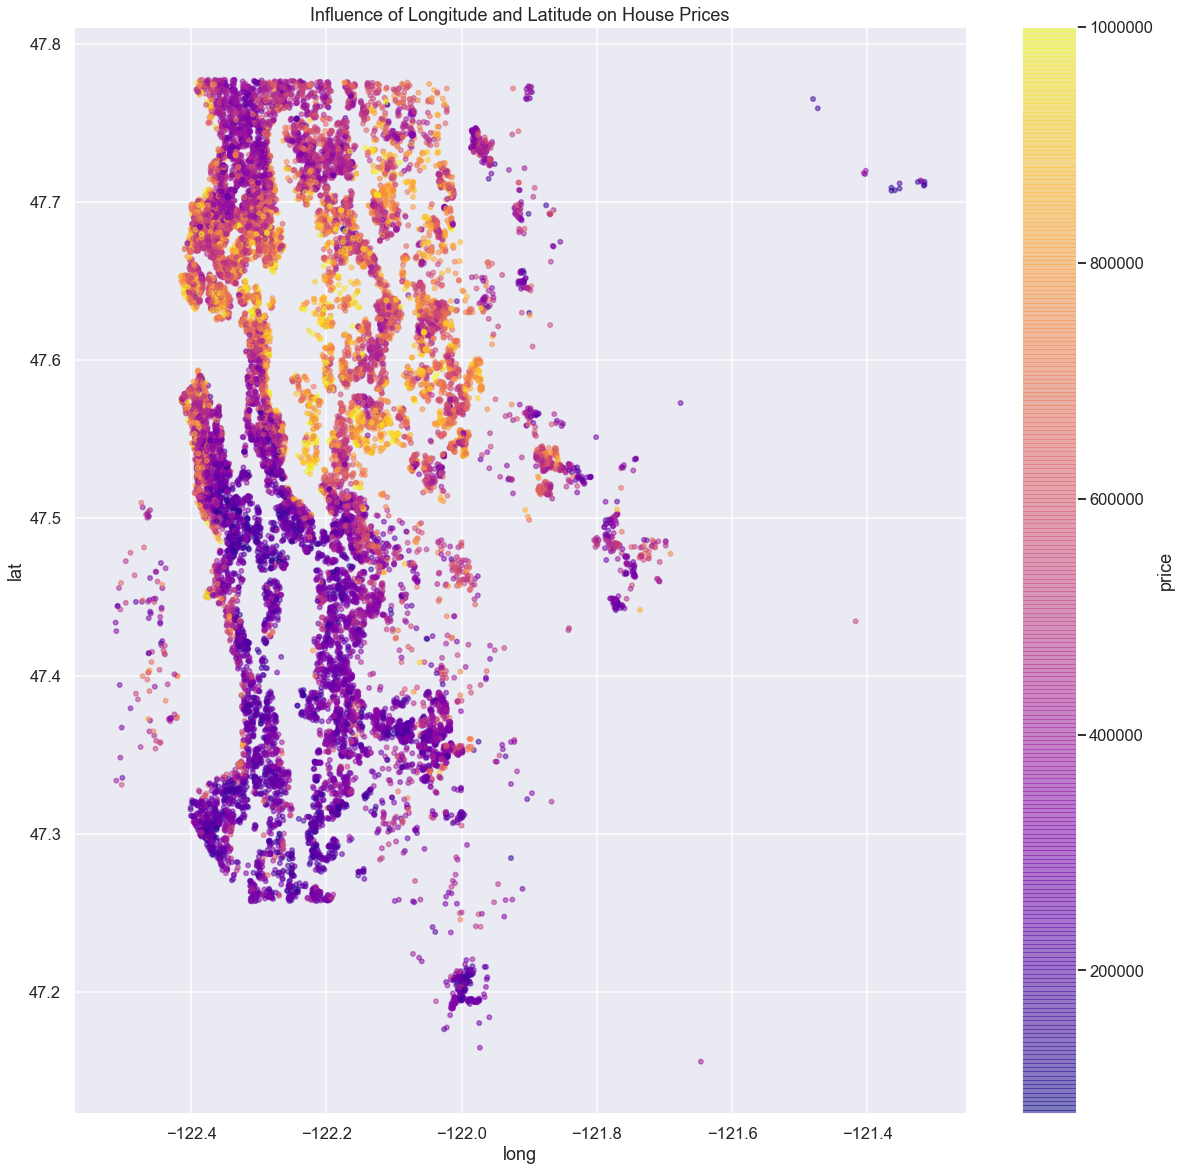

In [413]:
df.plot(kind='scatter', x='long', y='lat', alpha=.5, figsize=(20,20), c='price', cmap='plasma', sharey=True, sharex=False)
plt.title('Influence of Longitude and Latitude on House Prices')

#### This shows a pretty interesting relationship between coordinates and prices of homes.  When checking on a map (-122.4, 47.3) is located in Tacoma, WA fairly close to the water.  When comparing the location to (-122.0, 47.7) it becomes clear that lower price of the home is due to its distance from the water and the city.  Showing that access to a bustling city life as well as outdoor recreation drives up prices.

# We will now try to answer the following questions:
What drives prices up?
How location is playing role?

/Users/MattPucci/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


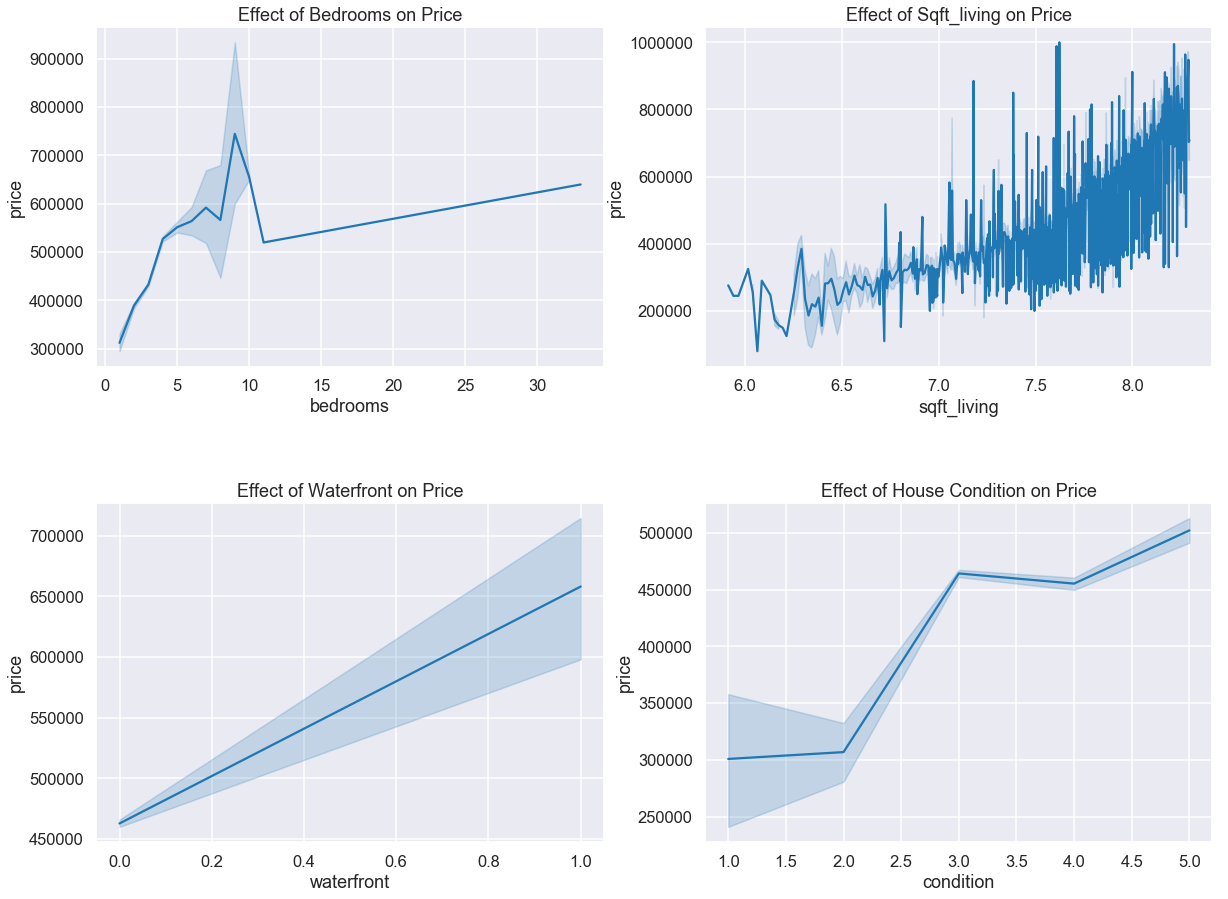

In [414]:
import seaborn as sns #Looking into relationships between variables and price using a Seaborn Lineplot.
plt.figure(figsize=(20,15))

plt.subplot(221)
sns.lineplot(df.bedrooms, df.price)
plt.title('Effect of Bedrooms on Price')
plt.subplot(222)
sns.lineplot(df.sqft_living, df.price)
plt.title('Effect of Sqft_living on Price')
plt.subplot(223)
sns.lineplot(df.waterfront, df.price)
plt.title('Effect of Waterfront on Price')
plt.subplot(224)
sns.lineplot(df.condition, df.price)
plt.title('Effect of House Condition on Price')


plt.subplots_adjust(hspace=0.40)
sns.set_style('darkgrid')
sns.color_palette('pastel')
plt.show()

Text(0.5, 1.0, 'Effect of Basement Size on Price')

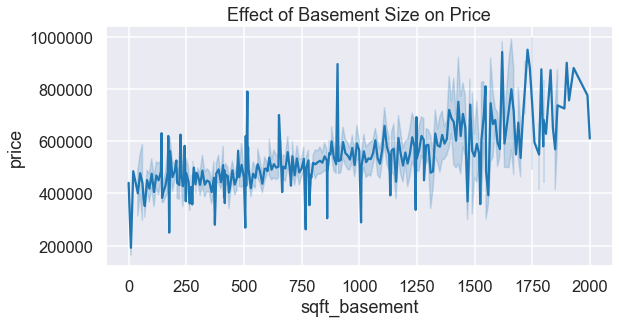

In [415]:
##REVIEW
import seaborn as sns #Looking into relationships between variables and price using a Seaborn Lineplot.
plt.figure(figsize=(20,15))
plt.subplot(321)
sns.lineplot(df.sqft_basement, df.price)
plt.title('Effect of Basement Size on Price')

#### All of the above lineplots show that condition, waterfront, sqft_living, sqft_basement and bedrooms all drive prices up.  Let's look more in depth into the relationship between sqft_living and prices by creating Seaborn Scatterplots with sqft_living on the X axis and non_log_price on the y axis with our hue value as different variables that could pottentially play a role in the strong correlation between sqft_living and prices.

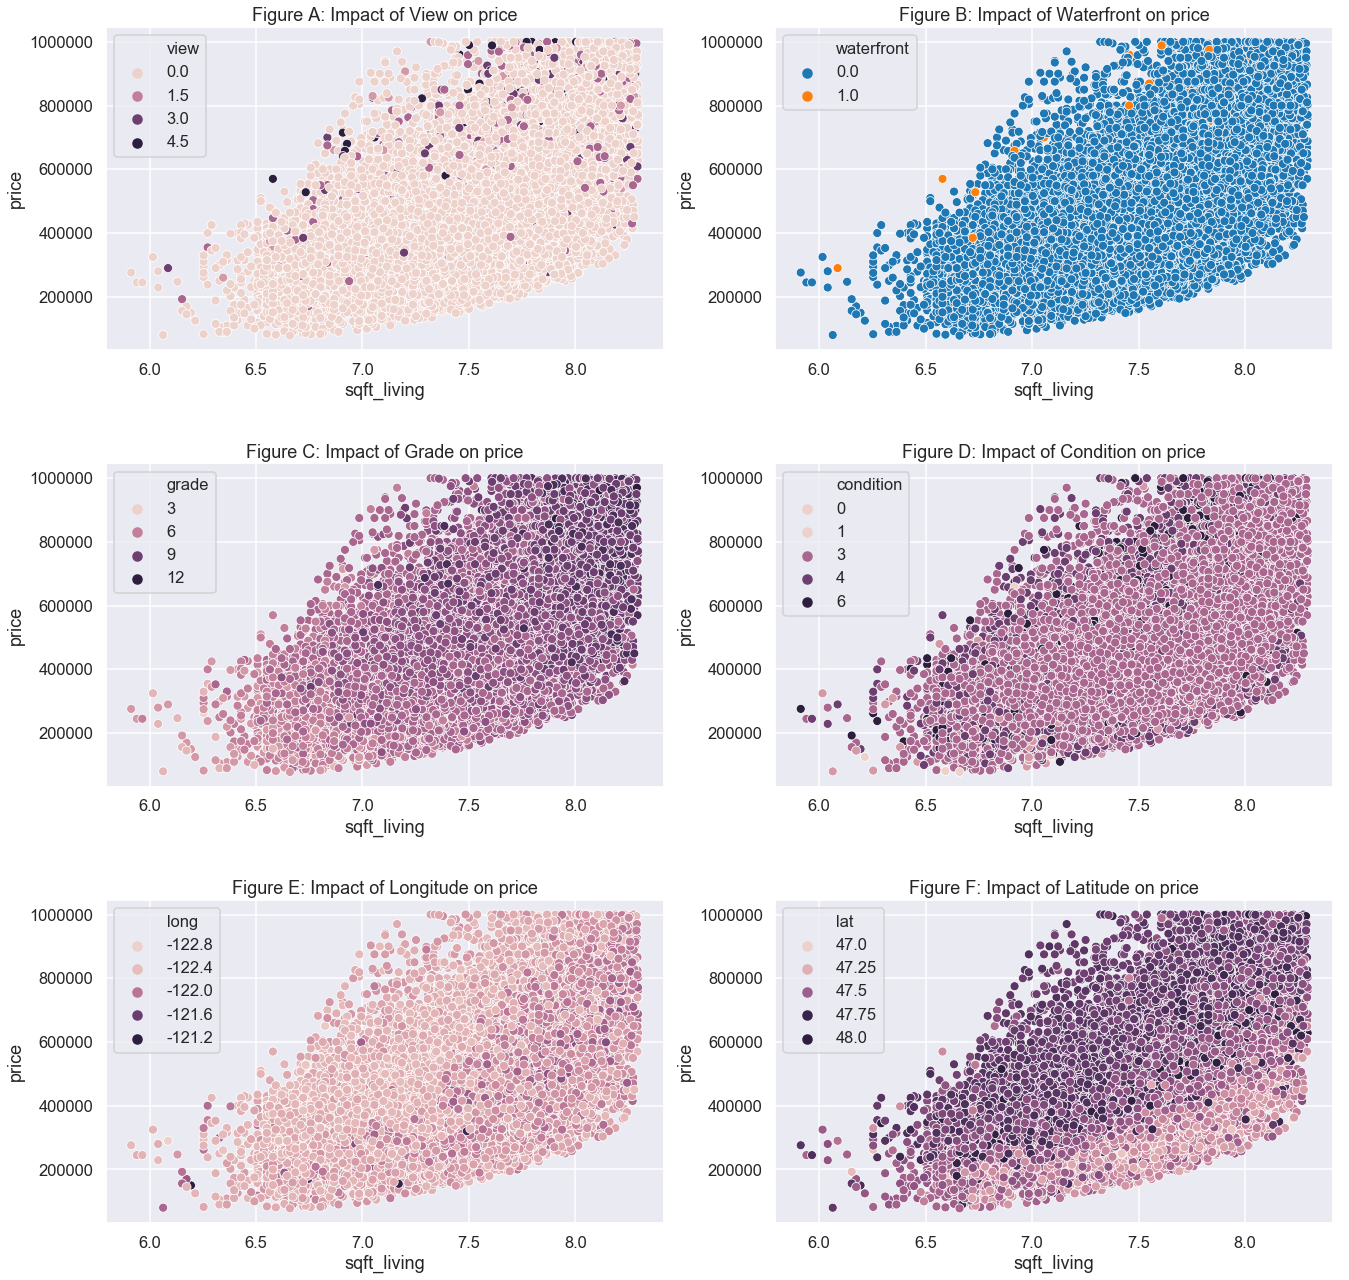

In [416]:
import seaborn as sns
plt.figure(figsize=(22,22))

plt.subplot(321)
sns.scatterplot(df.sqft_living, df.price, hue=df.view)
plt.title('Figure A: Impact of View on price')
plt.subplot(322)
sns.scatterplot(df.sqft_living, df.price, hue=df.waterfront)
plt.title('Figure B: Impact of Waterfront on price')
plt.subplot(323)
sns.scatterplot(df.sqft_living, df.price, hue=df.grade)
plt.title('Figure C: Impact of Grade on price')
plt.subplot(324)
sns.scatterplot(df.sqft_living, df.price, hue=df.condition)
plt.title('Figure D: Impact of Condition on price')
plt.subplot(325)
sns.scatterplot(df.sqft_living, df.price, hue=df.long)
plt.title('Figure E: Impact of Longitude on price')
plt.subplot(326)
sns.scatterplot(df.sqft_living, df.price, hue=df.lat)
plt.title('Figure F: Impact of Latitude on price')

plt.subplots_adjust(hspace=0.35)
sns.set_style('darkgrid')
sns.set_context('poster')
plt.show()

###### The above Seaborn scatterplots highlight some interesting relationships that can help us better understand what drives prices up. 

- Figure A:  This figure shows us that as a house gets more views, the price may rise ever so slightly.  As square footage of the house increases, the effect of the number of views on price becomes stronger. 

- Figure B: This scatterplot shows us that general proximity to the water will drive prices up.  As the house size increases the effect of waterfront is more significant on prices. 

- Figure C: Figure C shows us that as the grade of the home increases, the square footage of the home tends to increase with it, both leading to higher prices. 

- Figure D:  Does not show a clear relationship proving that the condition of the house is significant driving force behind price.  

- Figure E:  Figure E allows us to further understand what kind of housing market Kings County is.  The amount of points on the scatterplot signifying Longitudes of -122 to -123 shows that this area is more densely populated than homes with the Longitude of -121 to -121.5.  When cross referencing these coordinates to a map it shows that as the Longitude approaches -123 the home is closer to Lake Washington, Lake Sammamish, Seattle and its subburbs.  Showing once again that proximity to outdoor recreation (in this case water) as well as close proximity to a bustling city drives prices up in Kings County. 

- Figure F:  Similar to Figure E, Figure F shows us some more information about the housing market and demographic breakdown of the county.  The scatterplot is filled with houses associated with the Latitudes of 47.5 to 48.  On a map this shows that as Lattitude increaes, the home becomes closer to Seattle as well as its surrounding Lakes and its price becomes more expensive.  

### Lets now investigate when the best time to sell the house is as well as ways to improve house to make larger return.

<Figure size 1440x1440 with 0 Axes>

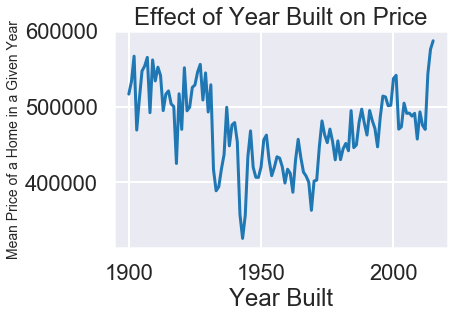

<Figure size 1440x1440 with 0 Axes>

In [417]:
#Lets look into how the year of construction of a home correlates to its price.
plt.plot(df.groupby('yr_built')['price'].mean())
plt.xlabel('Year Built')
plt.ylabel('Mean Price of a Home in a Given Year', fontdict={'fontsize':14})
plt.title('Effect of Year Built on Price')
plt.figure(figsize=(20,20))

### This shows that the year built has a major role in the price of the home.  This chart is not linear but shows how the price of the home fluctuates in a given year.  We will later transform this into a categorical variable.  

Now lets look into the best months and days to sell a home.

In [418]:
df.date = pd.to_datetime(df.date)

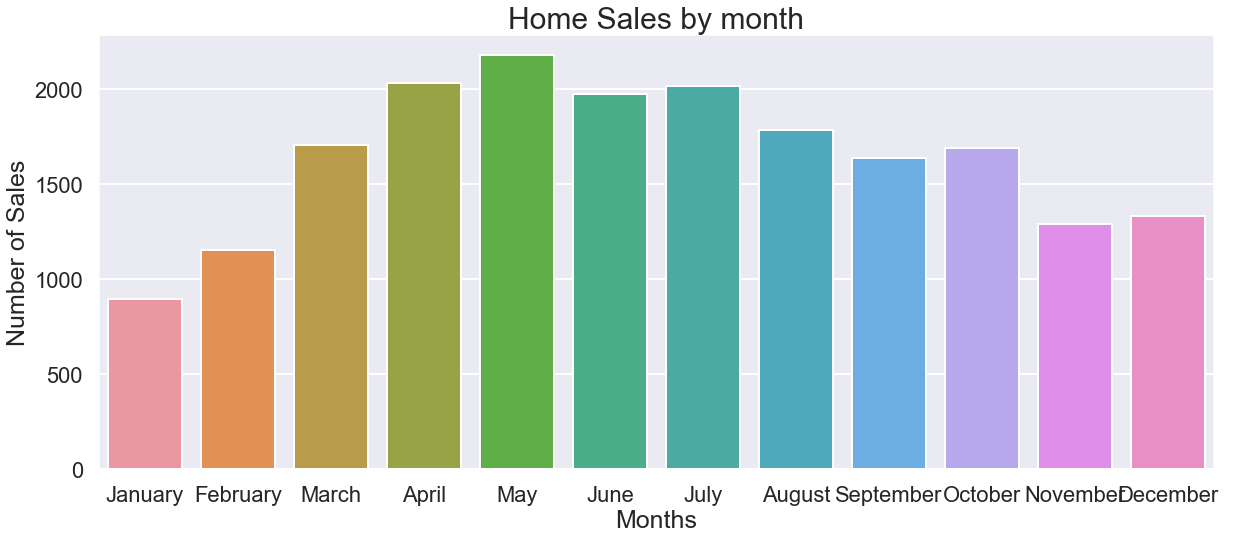

In [419]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December'] #define months
monthly_sales = []

for i in range(1,13):
    monthly_sales.append(sum(df.date.dt.month == i))
    
plt.figure(figsize=(20,8))
sns.barplot(months, monthly_sales)
plt.xlabel('Months', fontdict={'fontsize':25})
plt.ylabel('Number of Sales', fontdict={'fontsize':25})
plt.title('Home Sales by month', fontdict={'fontsize': 30})
plt.show()

##### The distribution of this data is normal, showing that most homes are bought in their highest quantity from April until August.  Possible explanations of this result:
- No one wants to move during the cold, lingering months of Winter.
- Public schools end classes traditionaly in May/June
- Public schools reopen in September/October

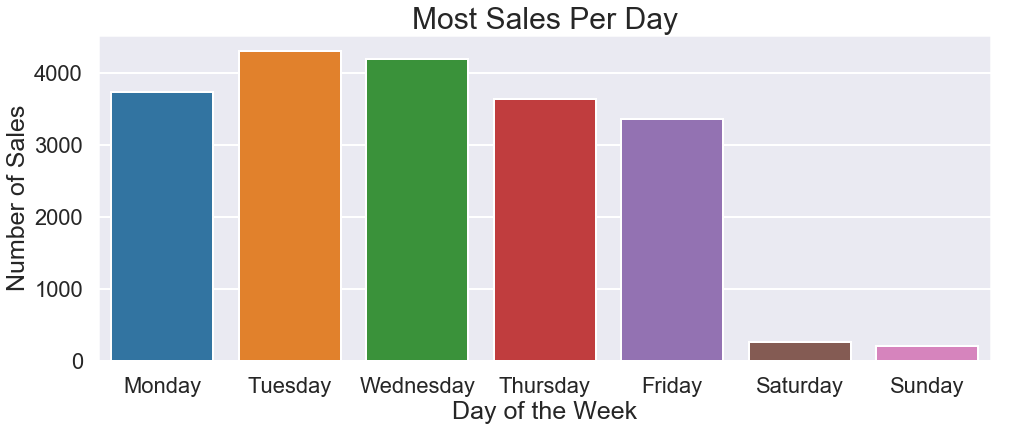

In [420]:
day_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] #repeating the same steps to see when most houses were sold.
daily_sales = []

for i in range(0,7):
    daily_sales.append(sum(df.date.dt.dayofweek == i))

plt.figure(figsize=(16,6))
sns.barplot(day_of_week,daily_sales)
plt.xlabel('Day of the Week', fontdict={'fontsize':25})
plt.ylabel('Number of Sales', fontdict={'fontsize':25})
plt.title('Most Sales Per Day', fontdict={'fontsize': 30})
plt.show()

##### The above visualizations show some interesting information on how month and day of the week play a roll in the sale of a home.  First and foremost, it is safe to say that a house is significantly more likely to be sold on a day of the week as compared to the weekend. Next we will do a forward regression of our data to identify the best predictors for our dataset given their P-Value.

# MODEL

In [448]:
import statsmodels.api as sm  #statsmodels forward regression used to determine which features are the best fit based on P-Value.
import pandas as pd
import numpy as np
def forward_regression(X, y,
                       threshold_in=0.01,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        if not changed:
            break
    return included

In [422]:
X = df.drop(['price','date'], axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=47)
i = 1
results_df = pd.DataFrame()
predictors = list()
reg_score = list()
mse_diffs = list()
added_pred = list()
previous_columns = []

In [423]:
forward_regression(X,y)

['sqft_living',
 'grade',
 'lat',
 'yr_built',
 'view',
 'floors',
 'condition',
 'zipcode',
 'bathrooms',
 'bedrooms',
 'waterfront',
 'sqft_lot',
 'sqft_lot15',
 'sqft_basement',
 'yr_renovated',
 'long']

##### The forward regression shows that these variables would be the most successful in a regression given their P-Values.  However, as we saw earlier in Figure 1, some of our features distributions still need to be addressed.  We will transform some of our features into category variables with dummie data.

In [424]:
# Initial transformations into category variables.
df.waterfront = df.waterfront.astype('category')
df.grade = df.grade.astype('category')
df.zipcode = df.zipcode.astype('category')
df.bedrooms = df.bedrooms.astype('category')
df.floors = df.floors.astype('category')
df.bathrooms = df.bathrooms.astype('int').astype('category')
df.yr_built = df.yr_built.astype('category')

# Now that our features are category variables, lets assign some dummie data to represent them.
waterfront = pd.get_dummies(df.waterfront, prefix='waterfront', drop_first=True)
grade = pd.get_dummies(df.grade, prefix='grade', drop_first=True)
zipcode = pd.get_dummies(df.zipcode, prefix='zipcode', drop_first=True)
bedrooms = pd.get_dummies(df.bedrooms, prefix='bedrooms', drop_first=True)
floors = pd.get_dummies(df.floors, prefix='floors', drop_first=True)
bathrooms = pd.get_dummies(df.bathrooms, prefix='bathrooms', drop_first=True)
yr_built = pd.get_dummies(df.yr_built, prefix='yr_built', drop_first=True)

# Add our transformed variables to the data set and remove the originals.
df = df.join([waterfront,grade, zipcode, bedrooms, floors, yr_built, bathrooms])
df.drop(['waterfront','grade','zipcode','bedrooms', 'floors', 'yr_built', 'bathrooms'], axis=1, inplace=True)

### The above shows some intiital transformations to some of our variables into category variables represented by dummie data.  Below we will deal with Longitude and Latitude, as earlier investigation shows they are both significant variables to this model.  We will bin the Long/Lat values to try to represent different coordinates as different pockets of location.  

In [425]:
segments = 10
bins = list(np.linspace(df.long.min(), df.long.max(), num=segments))
labels = [i for i in range(1,segments)]

# Hot encoding to Lat
df.lat = pd.cut(df.lat, bins, labels=labels)
df.lat = df.lat.astype('category')
lat = pd.get_dummies(df.lat,prefix='lat', drop_first=True)

# Hot encoding to Long
df.long = pd.cut(df.long, bins, labels=labels)
df.long = df.long.astype('category')
long = pd.get_dummies(df.long,prefix='long', drop_first=True)

# Adding dummie data to the original long/lat data.
df = df.join([lat, long])
df.drop(['lat','long'], axis=1, inplace=True)

In [426]:
def location_transform(df, n=10):
    model = SpectralClustering(n_clusters=n, affinity='nearest_neighbors',
                           assign_labels='kmeans')
    labels = model.fit_predict(df[['lat', 'long']])
    return labels, df[['lat', 'long']]
    
    
def predict_cluster(data_point, labels, gps):
    """ puts the new data to a cluster based on relative location """
    df = gps
    df['labels'] = labels
    
    x = (df['lat'] - data_point['lat'])**2
    y = (df['long'] - data_point['long'])**2
    
    inds = np.argmin(x + y)
    
    return df[['labels']].iloc[inds, :]

In [427]:
def data_clean(df_load):
    # this cleans our data to not reflect the changes we have made.
    df = df_load.copy()
    df.waterfront.fillna(0, inplace=True)
    df.yr_renovated.fillna(0, inplace=True)
    df.view.fillna(0, inplace=True)
    
    # last clean of the data to ensure it works properly.  
    df.loc[df.sqft_basement == '?', 'sqft_basement'] = 0.0
    df['sqft_basement'] = df['sqft_basement'].astype('float64')
    df.drop(['id', 'date', 'zipcode', 'grade'], axis=1, inplace=True)
    
    return df

def data_transform(df_load, labels):
    df = df_load.copy()
    
    # Get clusters
    df['location'] = labels
    
    df = data_clean(df)
    
    # transform the variables 
    df['basement'] = (df.sqft_basement > 0).astype('uint8')
    df['renovated'] = (df.yr_renovated > 0).astype('uint8')
    df['view'] = (df['view'] > 0).astype('uint8')
    
    # Log transform
    df[[x for x in df.columns if x.startswith('sqft')]] = np.log(df[[x for x in df.columns if x.startswith('sqft')]])
    
    # Dropping old variables
    df.drop(['sqft_basement', 'sqft_above', 'yr_renovated', 'lat', 'long'], axis=1, inplace=True)
    
    # Convert to category and encode
    df[['location', 'yr_built', 'condition']] = df[['location', 'yr_built', 'condition']].astype('category')
    df = pd.get_dummies(df)
    
    return df

In [428]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=10, affinity='nearest_neighbors',
                           assign_labels='kmeans')

In [429]:
df_load = pd.read_csv('kc_house_data.csv')
labels, gps = location_transform(df_load, n=15)
df_final = data_transform(df_load, labels)
df_final.info()

/Users/MattPucci/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 148 entries, price to location_14
dtypes: float64(8), int64(1), uint8(139)
memory usage: 4.3 MB


/Users/MattPucci/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


In [433]:
df_reg = data_clean(df_load)
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(8)
memory usage: 2.8 MB


In [442]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [435]:
df['price_log'] = np.log(df.price)

In [436]:
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as lm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from statsmodels.formula.api import ols

In [280]:
# Reload and test function
df_load = pd.read_csv('kc_house_data.csv')
labels, gps = location_transform(df_load, n=15)
df_final = data_transform(df_load, labels)
df_final.info()

/Users/MattPucci/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 44 columns):
price                    21597 non-null float64
bedrooms                 21597 non-null int64
bathrooms                21597 non-null float64
sqft_living              21597 non-null float64
sqft_lot                 21597 non-null float64
floors                   21597 non-null float64
waterfront               21597 non-null float64
view                     21597 non-null uint8
sqft_living15            21597 non-null float64
sqft_lot15               21597 non-null float64
basement                 21597 non-null uint8
renovated                21597 non-null uint8
condition_1              21597 non-null uint8
condition_2              21597 non-null uint8
condition_3              21597 non-null uint8
condition_4              21597 non-null uint8
condition_5              21597 non-null uint8
yr_built_(1899, 1909]    21597 non-null uint8
yr_built_(1909, 1919]    21597 non-null uint8
y

/Users/MattPucci/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log


In [439]:
X_1, y_1 = df_final[[x for x in df_final.columns if x != 'price']], df_final[['price']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size = 0.2, random_state=123)

X_2, y_2 = df_reg[[x for x in df_reg.columns if x != 'price']], df_reg[['price']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size = 0.2, random_state=123)

In [440]:
model_1 = sm.OLS(np.log(y1_train), sm.add_constant(X1_train)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     378.6
Date:                Tue, 03 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:16:06   Log-Likelihood:                -1100.0
No. Observations:               17277   AIC:                             2490.
Df Residuals:                   17132   BIC:                             3615.
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.0630      0.053     95.285      0.000       4.959       5.167
bedrooms         -0.0393      0.003    -13.688      0.000      -0.045      -0.034
bathrooms         0.0815      0.005     17.150      0.000       0.072       0.091
sqft_living       0.5201      0.011     48.913      0.000       0.499       0.541
sqft_lot          0.0325      0.006      5.597      0.000       0.021       0.044
floors            0.0460      0.006      7.697      0.000       0.034       0.058
waterfront        0.5494      0.026     21.207      0.000       0.499       0.600
view              0.2018      0.007     26.959      0.000       0.187       0.216
sqft_living15     0.3248      0.010     32.018      0.000       0.305       0.345
sqft_lot15       -0.0231      0.006     -3.647      0.000      -0.036      -0.011
basement          0.0029      0.005      0.564      0.573      -0.007       0.013
renovated         0.0721      0.011      6.316      0.000       0.050       0.094
condition_1       0.7374      0.045     16.355      0.000       0.649       0.826
condition_2       0.9653      0.023     41.352      0.000       0.920       1.011
condition_3       1.0719      0.015     73.176      0.000       1.043       1.101
condition_4       1.1162      0.015     75.481      0.000       1.087       1.145
condition_5       1.1722      0.016     75.290      0.000       1.142       1.203
yr_built_1900     0.1486      0.030      4.929      0.000       0.089       0.208
yr_built_1901     0.1238      0.056      2.191      0.028       0.013       0.235
yr_built_1902     0.1633      0.053      3.096      0.002       0.060       0.267
yr_built_1903     0.1147      0.040      2.840      0.005       0.036       0.194
yr_built_1904     0.2457      0.042      5.862      0.000       0.164       0.328
yr_built_1905     0.2532      0.033      7.674      0.000       0.189       0.318
yr_built_1906     0.2619      0.030      8.725      0.000       0.203       0.321
yr_built_1907     0.2983      0.038      7.906      0.000       0.224       0.372
yr_built_1908     0.1130      0.032      3.517      0.000       0.050       0.176
yr_built_1909     0.2943      0.030      9.912      0.000       0.236       0.353
yr_built_1910     0.2106      0.025      8.541      0.000       0.162       0.259
yr_built_1911     0.2608      0.033      7.800      0.000       0.195       0.326
yr_built_1912     0.1358      0.033      4.167      0.000       0.072       0.200
yr_built_1913     0.2117      0.041      5.130      0.000       0.131       0.293
yr_built_1914     0.1864      0.041      4.570      0.000       0.106       0.266
yr_built_1915     0.1731      0.036      4.786      0.000       0.102       0.244
yr_built_1916     0.2001      0.033      6.087      0.000       0.136       0.265
yr_built_1917     0.1673      0.041      4.050   

In [441]:
model_2 = sm.OLS(y2_train, sm.add_constant(X2_train)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     2195.
Date:                Tue, 03 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:16:29   Log-Likelihood:            -2.3629e+05
No. Observations:               17277   AIC:                         4.726e+05
Df Residuals:                   17260   BIC:                         4.727e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -5.33e+07   1.81e+06    -29.372      0.000   -5.69e+07   -4.97e+07
bedrooms      -4.242e+04   2192.016    -19.354      0.000   -4.67e+04   -3.81e+04
bathrooms      5.334e+04   3811.311     13.995      0.000    4.59e+04    6.08e+04
sqft_living     157.8815     22.645      6.972      0.000     113.495     202.268
sqft_lot          0.1357      0.054      2.515      0.012       0.030       0.241
floors         1.433e+04   4171.354      3.436      0.001    6154.608    2.25e+04
waterfront     6.636e+05   2.17e+04     30.639      0.000    6.21e+05    7.06e+05
view           5.818e+04   2460.351     23.648      0.000    5.34e+04     6.3e+04
condition      3.346e+04   2712.300     12.337      0.000    2.81e+04    3.88e+04
sqft_above       83.6608     22.625      3.698      0.000      39.313     128.009
sqft_basement    24.0922     22.472      1.072      0.284     -19.955      68.140
yr_built      -1660.1810     81.144    -20.460      0.000   -1819.232   -1501.131
yr_renovated     32.3728      4.560      7.099      0.000      23.434      41.312
lat            6.373e+05   1.21e+04     52.743      0.000    6.14e+05    6.61e+05
long          -2.131e+05   1.38e+04    -15.447      0.000    -2.4e+05   -1.86e+05
sqft_living15    73.1114      3.823     19.124      0.000      65.618      80.605
sqft_lot15       -0.4369      0.084     -5.218      0.000      -0.601      -0.273
==============================================================================
Omnibus:                    12565.161   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           710662.926
Skew:                           2.932   Prob(JB):                         0.00
Kurtosis:                      33.868   Cond. No.                     5.89e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Linear Regression

Final List of Features Used:
    - Sqft_livin                -Zipcode (CV)
    - Grade (CV)                -Bathrooms(CV)
    - Latitude (binned)         -Bedrooms (CV)
    - Longtitude (binned)       -Waterfront(CV)
    - Yr_built (CV)             -Sqft_lot
    - View                      
    - Floors
    - Condition

Lets now start to build out our model.  We will identify which features are the best to use in our model by using a Linear Regression.

In [170]:
from sklearn import metrics
import numpy as np
from sklearn.linear_model import LinearRegression
def linear_regression(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    # Crucial to any model to accurately reflect errors.
    print('R^2 Score:',round(linreg.score(X, y),2))
    print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),5))
    print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))
    print('-----------------------------------')
    print('Average Predicted Price:', round(y_pred.mean(),4))
    print('Average Actual Price:', round(y_test.mean(), 4))
    # Lets get a visualization of how well our model predicted the house prices.

    plt.figure(figsize=(16,6))
    sns.lineplot(range(len(y_pred[:75])), y_pred[:75], label='Predicted Home Prices')
    sns.lineplot(range(len(y_pred[:75])), y_test[:75], label='Actual Home Prices')
    plt.title('Figure 2: Predicted Prices Compared to Actual', fontdict={'fontsize': 20}), plt.xlabel('Count'), plt.ylabel('Prices')
    plt.legend(), plt.show()
    return(linreg,y_pred, y_test) 

In [173]:
linreg=LinearRegression()
def cross_validation(X, y, cv=15, show_scores=True):
    score = cross_val_score(linreg, X, y, cv=cv, scoring="r2")
    print('Model Accuracy:',round(sum(score)/len(score),2)*100, '%')
    print(score) if show_scores else False
    
def feature_selection(X, y):
    est = sm.OLS(y, X).fit()
    pvalues = pd.DataFrame(est.pvalues, columns=['p'])
    features = list(pvalues[pvalues.p < 0.05].index)
    return features

R^2 Score: 0.84
Mean Absolute Error: 59221.45738
Root Mean Squared Error: 79568.9932
-----------------------------------
Average Predicted Price: 463241.1238
Average Actual Price: 462221.201


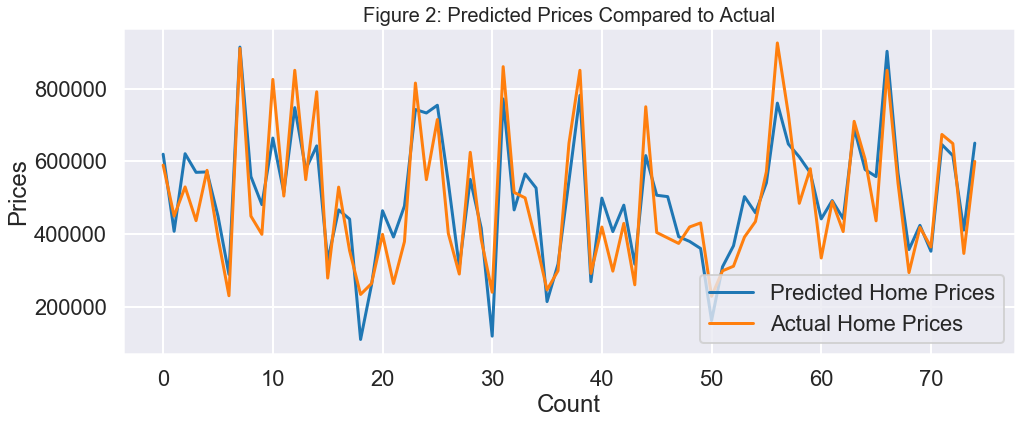

Model Accuracy: 83.0 %
[0.83875274 0.83242853 0.82301826 0.82261963 0.84567822 0.81081694
 0.82336027 0.83236299 0.83666962 0.84530705 0.82513363 0.84065488
 0.8161861  0.8319492  0.83957873]


In [174]:
X = df.drop(['price','date'],axis=1)
y = df.price
linear_regression(X, y)
cross_validation(X, y, cv=15, show_scores=True)

# Conclusions

The model predicted prices with 83% accuracy.  The above figure is limited to 75 observations purely to maximize the ability to easily interpret the visual.  Including more observations blended the colors of the different lines making it hard to differentiate.  
Some future work on this model would to be to further explore the signifance of variables that were transformed into category variables as well as further exploration into the significance of Longitude and Latitude and how binning these features could have altered the model.